In [192]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
import keras
from sklearn.metrics import f1_score
from tensorflow.keras.models import Model, Sequential 
from tensorflow.keras.layers import  BatchNormalization, Conv2D, Dropout, MaxPooling2D ,Flatten, Dense
from tensorflow.keras.layers import  Conv1D, MaxPooling1D
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import utils
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
game = pd.read_csv('game.csv')

In [3]:
game_num = game.to_numpy()
pre_num_contest = 3

In [4]:
def get_players(i):
    players=[];
    for j in range(5, 15):
        players.append(game_num[i][j])
    for j in range(20,30):
        players.append(game_num[i][j])
    date = game_num[i][1]
    players=np.array(players)
    return (players, date)

In [5]:
def get_player_data(player, date):
    num_of_attribute = 23
    name=player
    X = []
    none_player = np.ones((num_of_attribute));
    if player=='none':
        X.append(none_player)
        X.append(none_player)
        X.append(none_player)
        return X
    date_index = 1
    
    path = 'player2/'+player+'.csv'
    player = pd.read_csv(path)
    player_data = player.to_numpy()
    
    for i in range(0, len(player_data)):
        if player_data[i][date_index]==date:
            for k in range(1, pre_num_contest+1):
                if(i-k>=0):
                    X.append(player_data[i-k][date_index+1:])
                else:
                    X.append(none_player)
            break
    X = np.array(X)
    
    return X

def get_winner(i):
    return game_num[i][4]

In [8]:
total_num_of_game  = game_num.shape[0]
total_num_of_player_in_one_game = 20
X=[]
Y = [];
# for i in range(4, total_num_of_game):
#     if(i%50==0):
#         print(i)
#     players=[]
#     (players, date) = get_players(i)
#     Y.append(get_winner(i))
#     for j in range(0, total_num_of_player_in_one_game):
#         if j==0:
#             tmp = get_player_data(players[j], date);
#         else:   
#             test = (get_player_data(players[j], date))
#             tmp = np.concatenate((tmp, test));
        
#     X.append(tmp);

# X = np.array(X)
# Y = np.array(Y)
# print(X.shape)
# X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
# X = X.astype(float)

# print(X.shape)
# print(Y.shape)

In [48]:
# X_train, Y_train = np.concatenate((X[:1000, :], X[1300:2300, :], X[2600:3600, :], X[3900:4900, :], X[5200:6200, :]), axis=0), np.concatenate((Y[:1000], Y[1300:2300], Y[2600:3600], Y[3900:4900], Y[5200:6200]), axis=0)
# X_val, Y_val = np.concatenate((X[1000:1300, :], X[2300:2600, :], X[3600:3900, :], X[4900:5200, :], X[6200:, :]), axis=0), np.concatenate((Y[1000:1300], Y[2300:2600], Y[3600:3900], Y[4900:5200], Y[6200:]), axis=0)

In [12]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(5000, 60, 23, 1)
(5000,)
(1392, 60, 23, 1)
(1392,)


In [50]:
# np.save('X_train', X_train)
# np.save('Y_train', Y_train)
# np.save('X_val', X_val)
# np.save('Y_val', Y_val)

In [170]:
X_train = np.nan_to_num(np.load('X_train.npy'), copy=True, nan=0.0)
Y_train = np.load('Y_train.npy')
X_val = np.nan_to_num(np.load('X_val.npy'), copy=True, nan=0.0)
Y_val = np.load('Y_val.npy')

In [171]:
X_train, Y_train = utils.shuffle(X_train, Y_train)
X_val, Y_val = utils.shuffle(X_val, Y_val)

In [172]:

print(X_train.shape)
print(X_val.shape)
X_train = np.reshape(X_train, (5000, 60*23))
X_val = np.reshape(X_val, (1392, 60*23))
print(X_train.shape)
print(X_val.shape)

(5000, 60, 23, 1)
(1392, 60, 23, 1)
(5000, 1380)
(1392, 1380)


In [190]:
xgb_model = xgb.XGBClassifier(seed=84)
xgb_model.fit(X_train, Y_train)
xgb_model.score(X_val, Y_val)
# xgb_predict=xgb_model.predict(X_train)
# xgb_predict_val=xgb_model.predict(X_val)

c:\users\dan89\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.5790229885057471

In [188]:
svm_model = SVC(gamma='scale',probability=True)
svm_model.fit(X_train, Y_train)
svm_model.score(X_val, Y_val)
# svm_predict=svm_model.predict(X_train)
# svm_predict_val=svm_model.predict(X_val)

0.5998563218390804

ValueError: X.shape[1] = 2 should be equal to 1380, the number of features at training time

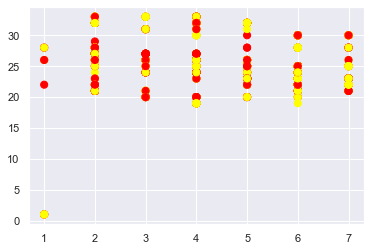

In [194]:
def plot_svm_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X_val[:, 0], X_val[:, 1], c=Y_val, s=50, cmap='autumn')
plot_svm_decision_function(svm_model);

In [189]:
GDB_model = GradientBoostingClassifier(loss='deviance', 
                                       criterion='friedman_mse',
                                       max_depth=4, 
                                       learning_rate=0.1, 
                                       max_features='sqrt')
GDB_model.fit(X_train, Y_train)
GDB_model.score(X_val, Y_val)
# GDB_predict=GDB_model.predict(X_train)
# GDB_predict_val=GDB_model.predict(X_val)

0.5998563218390804

In [186]:
RF_model = RandomForestClassifier(n_estimators = 1000, random_state = 42)
RF_model.fit(X_train, Y_train)
RF_model.score(X_val, Y_val)

0.6056034482758621

In [176]:
xgb_predict=np.reshape(xgb_predict, (5000,1))
svm_predict=np.reshape(svm_predict, (5000,1))
GDB_predict=np.reshape(GDB_predict, (5000,1))

In [177]:
xgb_predict_val=np.reshape(xgb_predict_val, (1392,1))
svm_predict_val=np.reshape(svm_predict_val, (1392,1))
GDB_predict_val=np.reshape(GDB_predict_val, (1392,1))

In [178]:
GDB_predict_val.shape

(1392, 1)

In [179]:
final_X=np.concatenate((xgb_predict,svm_predict,GDB_predict), axis=1)
final_X_val=np.concatenate((xgb_predict_val,svm_predict_val,GDB_predict_val), axis=1)

In [184]:
svm_model_final = SVC(gamma='scale',probability=True)
svm_model_final.fit(final_X, Y_train)
svm_model_final.score(final_X_val, Y_val)

0.5790229885057471

In [ ]:
plot

In [182]:
model_basic = Sequential() 


model_basic.add(Conv1D(2, kernel_size=2, input_shape = (3, 1), activation = 'relu'))
# model_basic.add(Conv1D(2, kernel_siz=2, activation = 'relu'))
model_basic.add(BatchNormalization())
model_basic.add(MaxPooling1D(pool_size = (2)))


model_basic.add(Flatten())
model_basic.add(Dropout(0.5))
# model_basic.add(Dense(units=100, activation = 'relu'))
model_basic.add(Dense(units=5, activation = 'relu'))
model_basic.add(Dense(units=1, activation = 'relu'))

model_basic.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_basic.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 2, 2)              6         
                                                                 
 batch_normalization_12 (Bat  (None, 2, 2)             8         
 chNormalization)                                                
                                                                 
 max_pooling1d_22 (MaxPoolin  (None, 1, 2)             0         
 g1D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 2)                 0         
                                                                 
 dropout_6 (Dropout)         (None, 2)                 0         
                                                                 
 dense_44 (Dense)            (None, 5)               

In [183]:
model_basic.fit(final_X, Y_train, epochs= 100, batch_size=20, validation_data=(final_X_val, Y_val), shuffle=True)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 1.3462 - accuracy: 0.6206 - val_loss: 2.7856 - val_accuracy: 0.5963
Epoch 2/100
250/250 [==============================] - 0s 985us/step - loss: 1.2294 - accuracy: 0.6742 - val_loss: 2.8114 - val_accuracy: 0.5963
Epoch 3/100
250/250 [==============================] - 0s 961us/step - loss: 1.1635 - accuracy: 0.6774 - val_loss: 2.7990 - val_accuracy: 0.5963
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 1.0460 - accuracy: 0.6590 - val_loss: 2.7499 - val_accuracy: 0.5963
Epoch 5/100
250/250 [==============================] - 0s 996us/step - loss: 1.0550 - accuracy: 0.6678 - val_loss: 2.7932 - val_accuracy: 0.5963
Epoch 6/100
250/250 [==============================] - 0s 987us/step - loss: 0.9779 - accuracy: 0.6826 - val_loss: 2.7657 - val_accuracy: 0.5963
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 1.0370 - accuracy: 0.6720 - val_loss: 2.7714 - val_accuracy

Epoch 58/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5020 - accuracy: 0.6896 - val_loss: 2.5238 - val_accuracy: 0.5963
Epoch 59/100
250/250 [==============================] - 0s 977us/step - loss: 0.5107 - accuracy: 0.6890 - val_loss: 2.5663 - val_accuracy: 0.5963
Epoch 60/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5102 - accuracy: 0.6912 - val_loss: 2.5957 - val_accuracy: 0.5963
Epoch 61/100
250/250 [==============================] - 0s 989us/step - loss: 0.5004 - accuracy: 0.6868 - val_loss: 2.5838 - val_accuracy: 0.5963
Epoch 62/100
250/250 [==============================] - 0s 980us/step - loss: 0.5094 - accuracy: 0.6898 - val_loss: 2.5779 - val_accuracy: 0.5963
Epoch 63/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5109 - accuracy: 0.6822 - val_loss: 2.5710 - val_accuracy: 0.5963
Epoch 64/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5066 - accuracy: 0.6840 - val_loss: 2.6033 - val_acc

In [97]:
model_basic.save("trash")
# model_basic

INFO:tensorflow:Assets written to: trash\assets


In [122]:
predict=model_basic.predict(final_X)
predict=np.round(predict)

In [124]:
accuracy_score(predict, Y_train)

0.4882